In [60]:
import numpy as np
import pandas as pd

gene_list = []  # the unique list of genes that match up with MS and AD

cell_paths = pd.read_csv("/Users/25yoon/PycharmProjects/rstuff/GIDAS2025.csv")
cell_paths["PValue"] = pd.to_numeric(cell_paths["PValue"])
cell_paths["MatchingMS"] = cell_paths["MatchingMS"].astype(bool)

for cond, gene in zip(cell_paths["MatchingMS"], cell_paths["Genes"]):
    if type(gene) == float:
        break
    if cond:
        gene = gene.split(",")
        for g in gene:
            gene_list.append(g)

gene_list = list(set(gene_list))
gene_list = [gene.replace(' ','') for gene in gene_list]
print(gene_list)


['MYO1E', 'IL1B', 'NAGA', 'EHD3', 'SIGLEC16', 'DLGAP5', 'GTSE1', 'GNG7', 'PLEKHA1', 'S1PR2', 'QPCT', 'RB1', 'SPAG9', 'PSMC4', 'SPATA25', 'UBE2C', 'ASTN2', 'CAPN3', 'ACTA2', 'DHRS11', 'NCF1', 'SLC26A11', 'FABP4', 'COL6A1', 'SLC3A2', 'HPGD', 'UGP2', 'S100A10', 'SKA2', 'SEMA4D', 'JAK1', 'KALRN', 'LAIR1', 'NFATC2', 'MCM4', 'ABCA1', 'CCL3L3', 'DUT', 'CDCA5', 'RRAS2', 'LGMN', 'PECAM1', 'ASPHD1', 'FADS1', 'CLSTN3', 'TAGAP', 'CR1L', 'C1QA', 'ST6GALNAC4', 'CLEC4A', 'AFAP1L1', 'ARFGAP1', 'PTPRE', 'ZNFX1', 'LY6E', 'MCM8', 'PPIC', 'C1S', 'BTN3A2', 'FUT4', 'SORL1', 'CD68', 'TMEM237', 'ALDH1A2', 'SAV1', 'LILRA5', 'TFDP1', 'TSPAN17', 'CD36', 'EDNRB', 'CACNG7', 'FGR', 'POU2F2', 'DHRS7', 'SCD', 'ST14', 'NCKAP1', 'DCAF5', 'LPXN', 'S1PR1', 'RBMX', 'MS4A7', 'LTBP2', 'APOE', 'GUCY1A2', 'DOCK3', 'SEMA4D', 'SLC18B1', 'PHLDA3', 'IFITM1', 'TGM5', 'IL6', 'GCNT1', 'NCF1B', 'KIF21A', 'HELLS', 'CTTN', 'PAICS', 'LAT2', 'ITGB3', 'DPEP2', 'IRAK3', 'CARS2', 'CD14', 'LIPA', 'MXRA7', 'SDC3', 'CD37', 'NEDD9', 'THBS3', 'S

519

In [45]:
ADCell = pd.read_csv("/Users/25yoon/PycharmProjects/rstuff/ADCellData.csv")
MSCell = pd.read_csv("/Users/25yoon/PycharmProjects/rstuff/MSData.csv")

dfs = [ADCell, MSCell]
for df in dfs:
    df["Gene_Name"] = df["Gene_Name"].astype(str)
    df["Gene_Name"] = df["Gene_Name"].str.replace(" ","", regex=False)
    df["validation"] = df["Gene_Name"].isin(gene_list)
'''
print(np.sum(ADCell["validation"]))
print(np.sum(MSCell["validation"]))
'''

503
674


In [69]:
intersection_temp = set(ADCell["Gene_Name"]) & set(MSCell["Gene_Name"])
intersection = set(intersection_temp) & set(gene_list)


463

In [58]:
# getting average for control and diseased for ad cell
ad_cols = list(ADCell.columns)
#print(ad_cols)
cell_cols = (ad_cols.index("ADCell_1"), ad_cols.index("ADCell_24")+1)
con_cols = (ad_cols.index("Control_1"), ad_cols.index("Control_33")+1)

ADCell["cell_avg"] = ADCell.iloc[:, cell_cols[0]:cell_cols[1]].mean(axis=1)
ADCell["control_avg"] = ADCell.iloc[:, con_cols[0]:con_cols[1]].mean(axis=1)




['ID_REF', 'Gene_Name', 'ADCell_1', 'ADCell_2', 'ADCell_3', 'ADCell_4', 'ADCell_5', 'ADCell_6', 'ADCell_7', 'ADCell_8', 'ADCell_9', 'ADCell_10', 'ADCell_11', 'ADCell_12', 'ADCell_13', 'ADCell_14', 'ADCell_15', 'ADCell_16', 'ADCell_17', 'ADCell_18', 'ADCell_19', 'ADCell_20', 'ADCell_21', 'ADCell_22', 'ADCell_23', 'ADCell_24', 'Control_1', 'Control_2', 'Control_3', 'Control_4', 'Control_5', 'Control_6', 'Control_7', 'Control_8', 'Control_9', 'Control_10', 'Control_11', 'Control_12', 'Control_13', 'Control_14', 'Control_15', 'Control_16', 'Control_17', 'Control_18', 'Control_19', 'Control_20', 'Control_21', 'Control_22', 'Control_23', 'Control_24', 'Control_25', 'Control_26', 'Control_27', 'Control_28', 'Control_29', 'Control_30', 'Control_31', 'Control_32', 'Control_33', 'validation', 'cell_avg']


In [59]:
# getting average for control and diseased for ms cell
ms_cols = list(MSCell.columns)
cell_cols = (ms_cols.index("MS_1"), ms_cols.index("MS_30")+1)
con_cols = (ms_cols.index("Control_1"), ms_cols.index("Control_10")+1)

MSCell["cell_avg"] = MSCell.iloc[:, cell_cols[0]:cell_cols[1]].mean(axis=1)
MSCell["control_avg"] = MSCell.iloc[:, con_cols[0]:con_cols[1]].mean(axis=1)


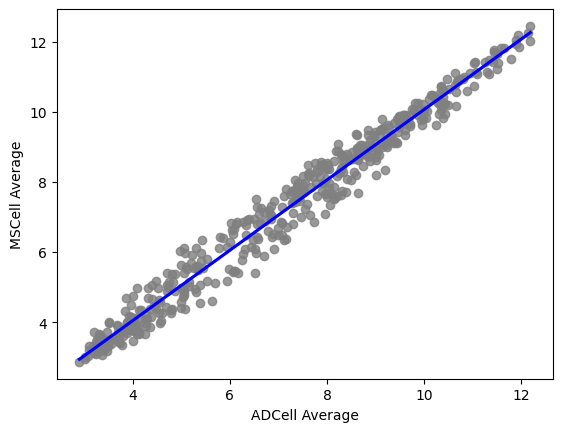

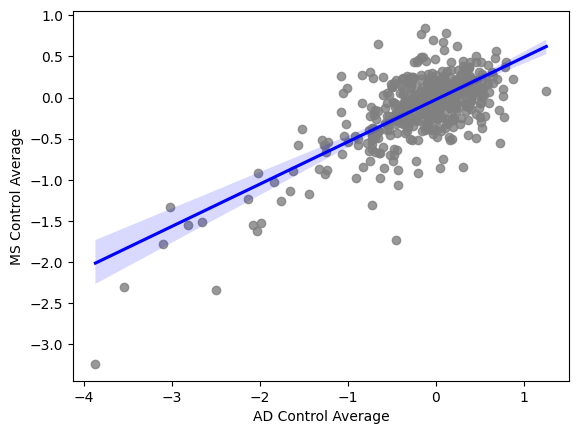

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt



cell_vals_AD = []
control_vals_AD = []
cell_vals_MS = []
control_vals_MS = []



filtered_AD = ADCell[ADCell["validation"] == True]
filtered_AD = filtered_AD[filtered_AD["Gene_Name"].isin(intersection)]
filtered_MS = MSCell[MSCell["validation"] == True]
filtered_MS = filtered_MS[filtered_MS["Gene_Name"].isin(intersection)]
filtered_AD = filtered_AD.sort_values("Gene_Name")
filtered_MS = filtered_MS.sort_values("Gene_Name")

for row in filtered_AD.itertuples():
    cell_vals_AD.append(row.cell_avg)
    control_vals_AD.append(row.control_avg)
for row in filtered_MS.itertuples():
    cell_vals_MS.append(row.cell_avg)
    control_vals_MS.append(row.control_avg)

sns.regplot(x = cell_vals_AD, y = control_vals_AD, scatter_kws={"color": "gray"},
    line_kws={"color": "blue"})
plt.xlabel("ADCell Average")
plt.ylabel("MSCell Average")
plt.show()

sns.regplot(x = cell_vals_MS, y = control_vals_MS, scatter_kws={"color": "gray"},
    line_kws={"color": "blue"})
plt.xlabel("AD Control Average")
plt.ylabel("MS Control Average")
plt.show()



In [85]:



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_model = LinearRegression()

x1 = np.array(cell_vals_AD).reshape(-1,1)
x2 = np.array(cell_vals_MS).reshape(-1,1)
y1 = np.array(control_vals_AD).reshape(-1,1)
y2 = np.array(control_vals_MS).reshape(-1,1)
linear_model.fit(x1, y1)
linear_model.fit(x2, y2)

y_pred_AD = linear_model.predict(x1)
y_pred_MS = linear_model.predict(x2)


AD_r2 = r2_score(x1, y_pred_AD)
MS_r2 = r2_score(x2, y_pred_MS)

